In [5]:
#import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder



In [6]:
# Load datasets
train_df = pd.read_csv("C://Users//lalit//OneDrive//Documents//Titanic_train.csv")
test_df = pd.read_csv("C://Users//lalit//OneDrive//Documents//Titanic_test.csv")


In [8]:
#Preview data
print(train_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


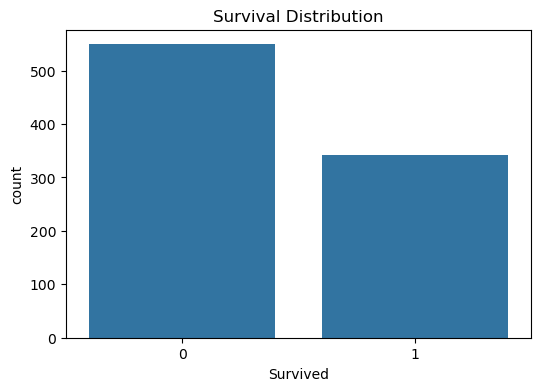

In [9]:
# Survival distribution
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='Survived')
plt.title("Survival Distribution")
plt.show()


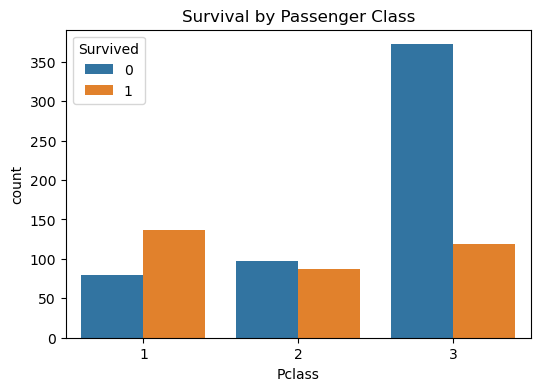

In [10]:
# Survival by class
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()


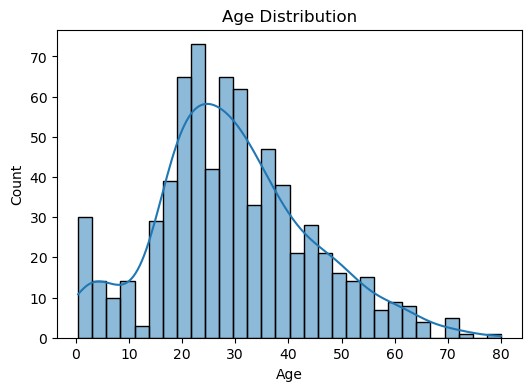

In [11]:
#Age distribution
plt.figure(figsize=(6,4))
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


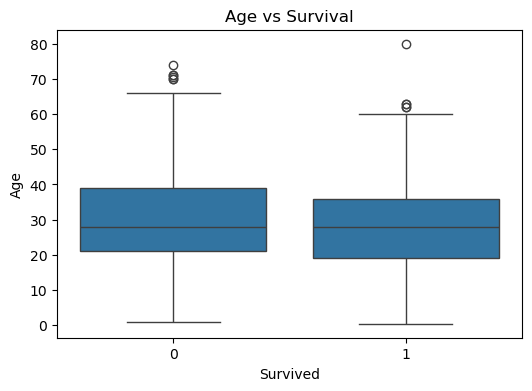

In [12]:
#Age vs Survival
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title("Age vs Survival")
plt.show()


In [13]:
#Handle missing values
train_df.fillna(method='ffill', inplace=True)
test_df.fillna(method='ffill', inplace=True)



C:\Users\lalit\AppData\Local\Temp\ipykernel_14908\524542405.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df.fillna(method='ffill', inplace=True)
C:\Users\lalit\AppData\Local\Temp\ipykernel_14908\524542405.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df.fillna(method='ffill', inplace=True)


In [14]:
# Encode categorical variables
label_enc = LabelEncoder()
for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col] = label_enc.fit_transform(train_df[col].astype(str))
    test_df[col] = label_enc.fit_transform(test_df[col].astype(str))



In [15]:
# Define features and target
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']



In [16]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
#Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



C:\Users\lalit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [18]:
# Predictions
y_pred = model.predict(X_val)



In [19]:
#  Evaluation 
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))



Accuracy: 0.8044692737430168
Confusion Matrix:
 [[91 14]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



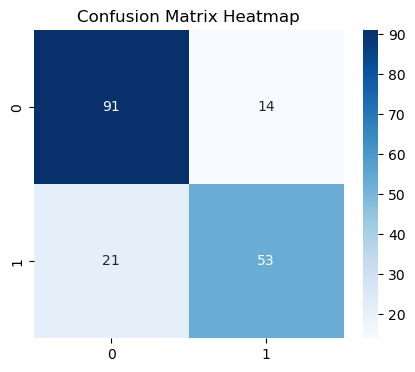

In [20]:
#Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.show()


In [21]:
#Predict on test data
test_predictions = model.predict(test_df)
print("Test Predictions (first 10):", test_predictions[:10])


Test Predictions (first 10): [0 1 0 0 1 0 1 0 1 0]
